In [53]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift
from sklearn import metrics
import numpy as np

# Data

In [3]:
df = pd.read_csv('Iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
X = df.iloc[:, : 4]
X = (X - X.mean()) / X.std()
y = df['Species'].astype('category').cat.codes

In [5]:
embs = umap.UMAP(random_state=42).fit_transform(X)

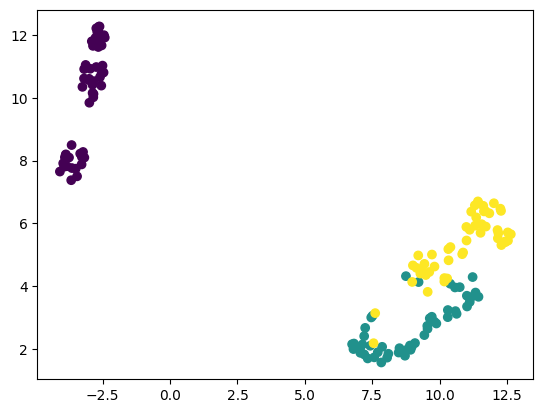

In [41]:
plt.scatter(embs[:, 0], embs[:, 1], c=y)
plt.show()

# Clustering

## KMeans

In [74]:
adj_rand = []
silhouette = []
for i in range(2, 10):
  model = KMeans(n_clusters=i, random_state=42, n_init=10).fit(X)
  if i == 3:
    labels = model.labels_
  adj_rand.append(metrics.adjusted_rand_score(y, model.labels_))
  silhouette.append(metrics.silhouette_score(X, model.labels_))

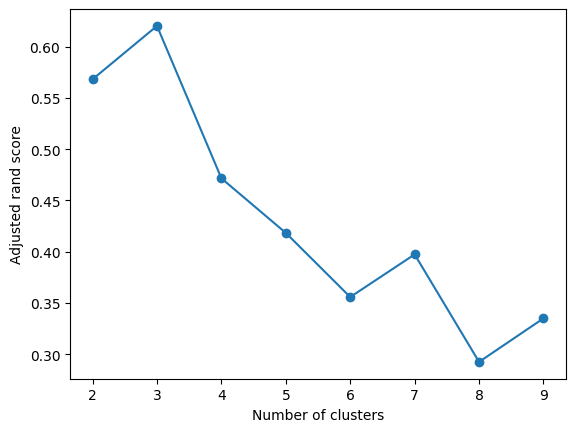

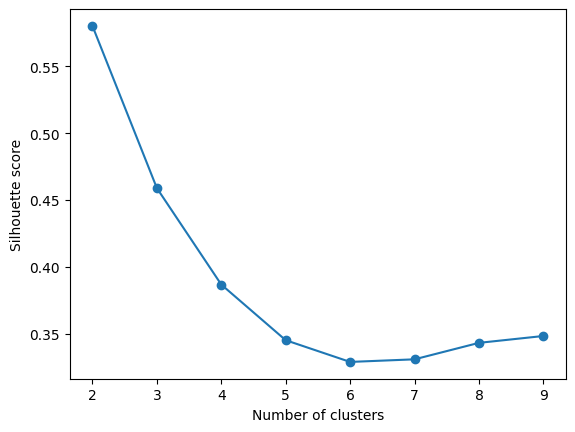

In [75]:
plt.subplot()
plt.plot(range(2,10), adj_rand, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted rand score')
plt.show()

plt.subplot()
plt.plot(range(2, 10), silhouette, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

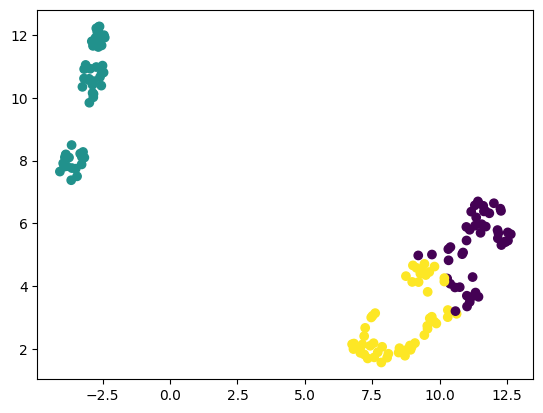

In [76]:
plt.scatter(embs[:, 0], embs[:, 1], c=labels)
plt.show()

## Mean-Shift

In [73]:
max_len = 0
for i in range(0, 150):
  for j in range(0, 150):
      max_len = max(max_len, np.linalg.norm(X.iloc[i] - X.iloc[j]))
max_len

6.516638798119328

In [78]:
adj_rand = []
silhouette = []
widths = []
best_adj = 0
best_sil = 0
for bandwidth in np.arange(0.1, 6.5, 0.1):
  model = MeanShift(bandwidth=bandwidth).fit(X)
  l = len(set(model.labels_))
  if l in range(2, len(X)):
    adj = metrics.adjusted_rand_score(y, model.labels_)
    sil = metrics.silhouette_score(X, model.labels_)
    if l == 3:
      if adj > best_adj:
        adj_labels = model.labels_
        adj_best_bandwidth = bandwidth
        best_adj = adj
      if sil > best_sil:
        sil_labels = model.labels_
        sil_best_bandwidth = bandwidth
        best_sil = sil
    widths.append(bandwidth)
    adj_rand.append(adj)
    silhouette.append(sil)

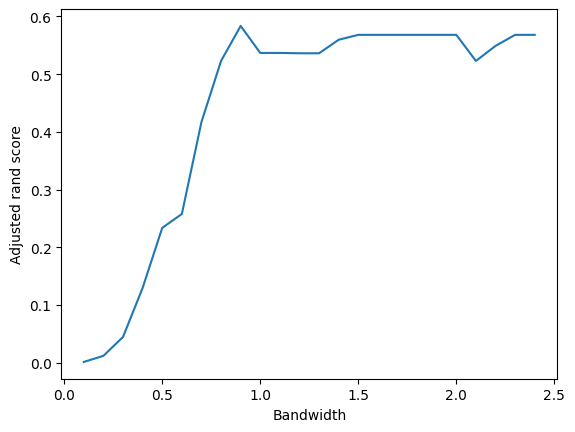

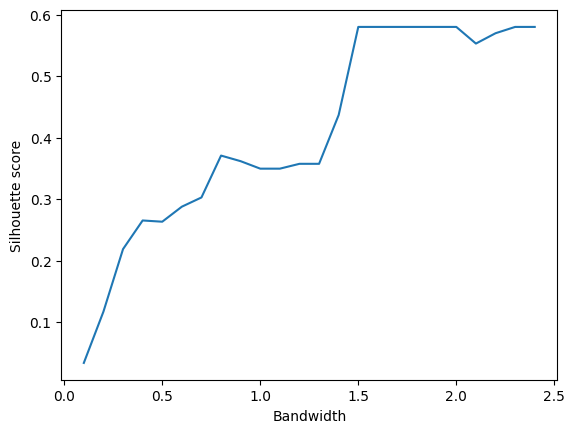

In [84]:
plt.subplot()
plt.plot(widths, adj_rand)
plt.xlabel('Bandwidth')
plt.ylabel('Adjusted rand score')
plt.show()

plt.subplot()
plt.plot(widths, silhouette)
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette score')
plt.show()

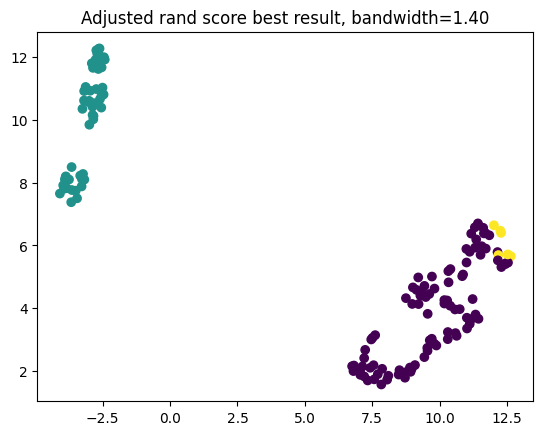

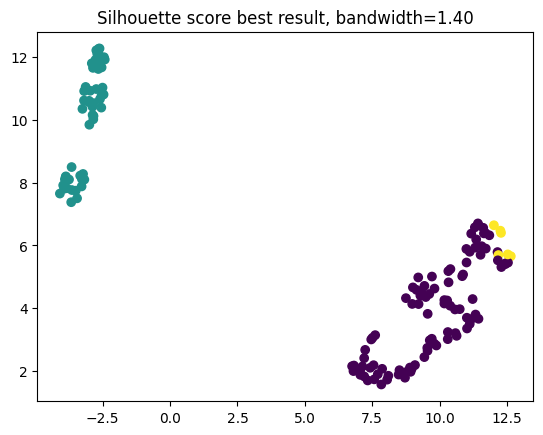

In [82]:
plt.subplot()
plt.scatter(embs[:, 0], embs[:, 1], c=adj_labels)
plt.title(f'Adjusted rand score best result, bandwidth={adj_best_bandwidth:.2f}')
plt.show()
plt.subplot()
plt.scatter(embs[:, 0], embs[:, 1], c=sil_labels)
plt.title(f'Silhouette score best result, bandwidth={sil_best_bandwidth:.2f}')
plt.show()